[View in Colaboratory](https://colab.research.google.com/github/tattn/TuriCreatePlayground/blob/master/TuriCreate_StyleTransfer.ipynb)

# Turi Createのインストール

In [1]:
!pip install turicreate==5.0b1

    100% |████████████████████████████████| 90.2MB 450kB/s 
    100% |████████████████████████████████| 2.7MB 5.2MB/s 
    100% |████████████████████████████████| 23.8MB 1.8MB/s 
  Running setup.py bdist_wheel for prettytable ... - done
  Stored in directory: /content/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0


# Google Driveのマウント

In [2]:
# https://qiita.com/uni-3/items/201aaa2708260cc790b8
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!mkdir -p drive/colab/StyleTransfer/content && mkdir -p drive/colab/StyleTransfer/style # 画像を配置するディレクトリの作成
!ls drive/colab/StyleTransfer/content

cat.png       IMG_0083.jpg  IMG_0433.jpg  IMG_1138.JPG	IMG_2293.JPG
IMG_0018.jpg  IMG_0163.jpg  IMG_0671.jpg  IMG_1274.JPG	IMG_2296.JPG
IMG_0033.jpg  IMG_0209.jpg  IMG_0848.jpg  IMG_1356.JPG	IMG_2432.JPG
IMG_0062.jpg  IMG_0318.jpg  IMG_0972.jpg  IMG_1697.JPG


# Turi Createでの画風変換

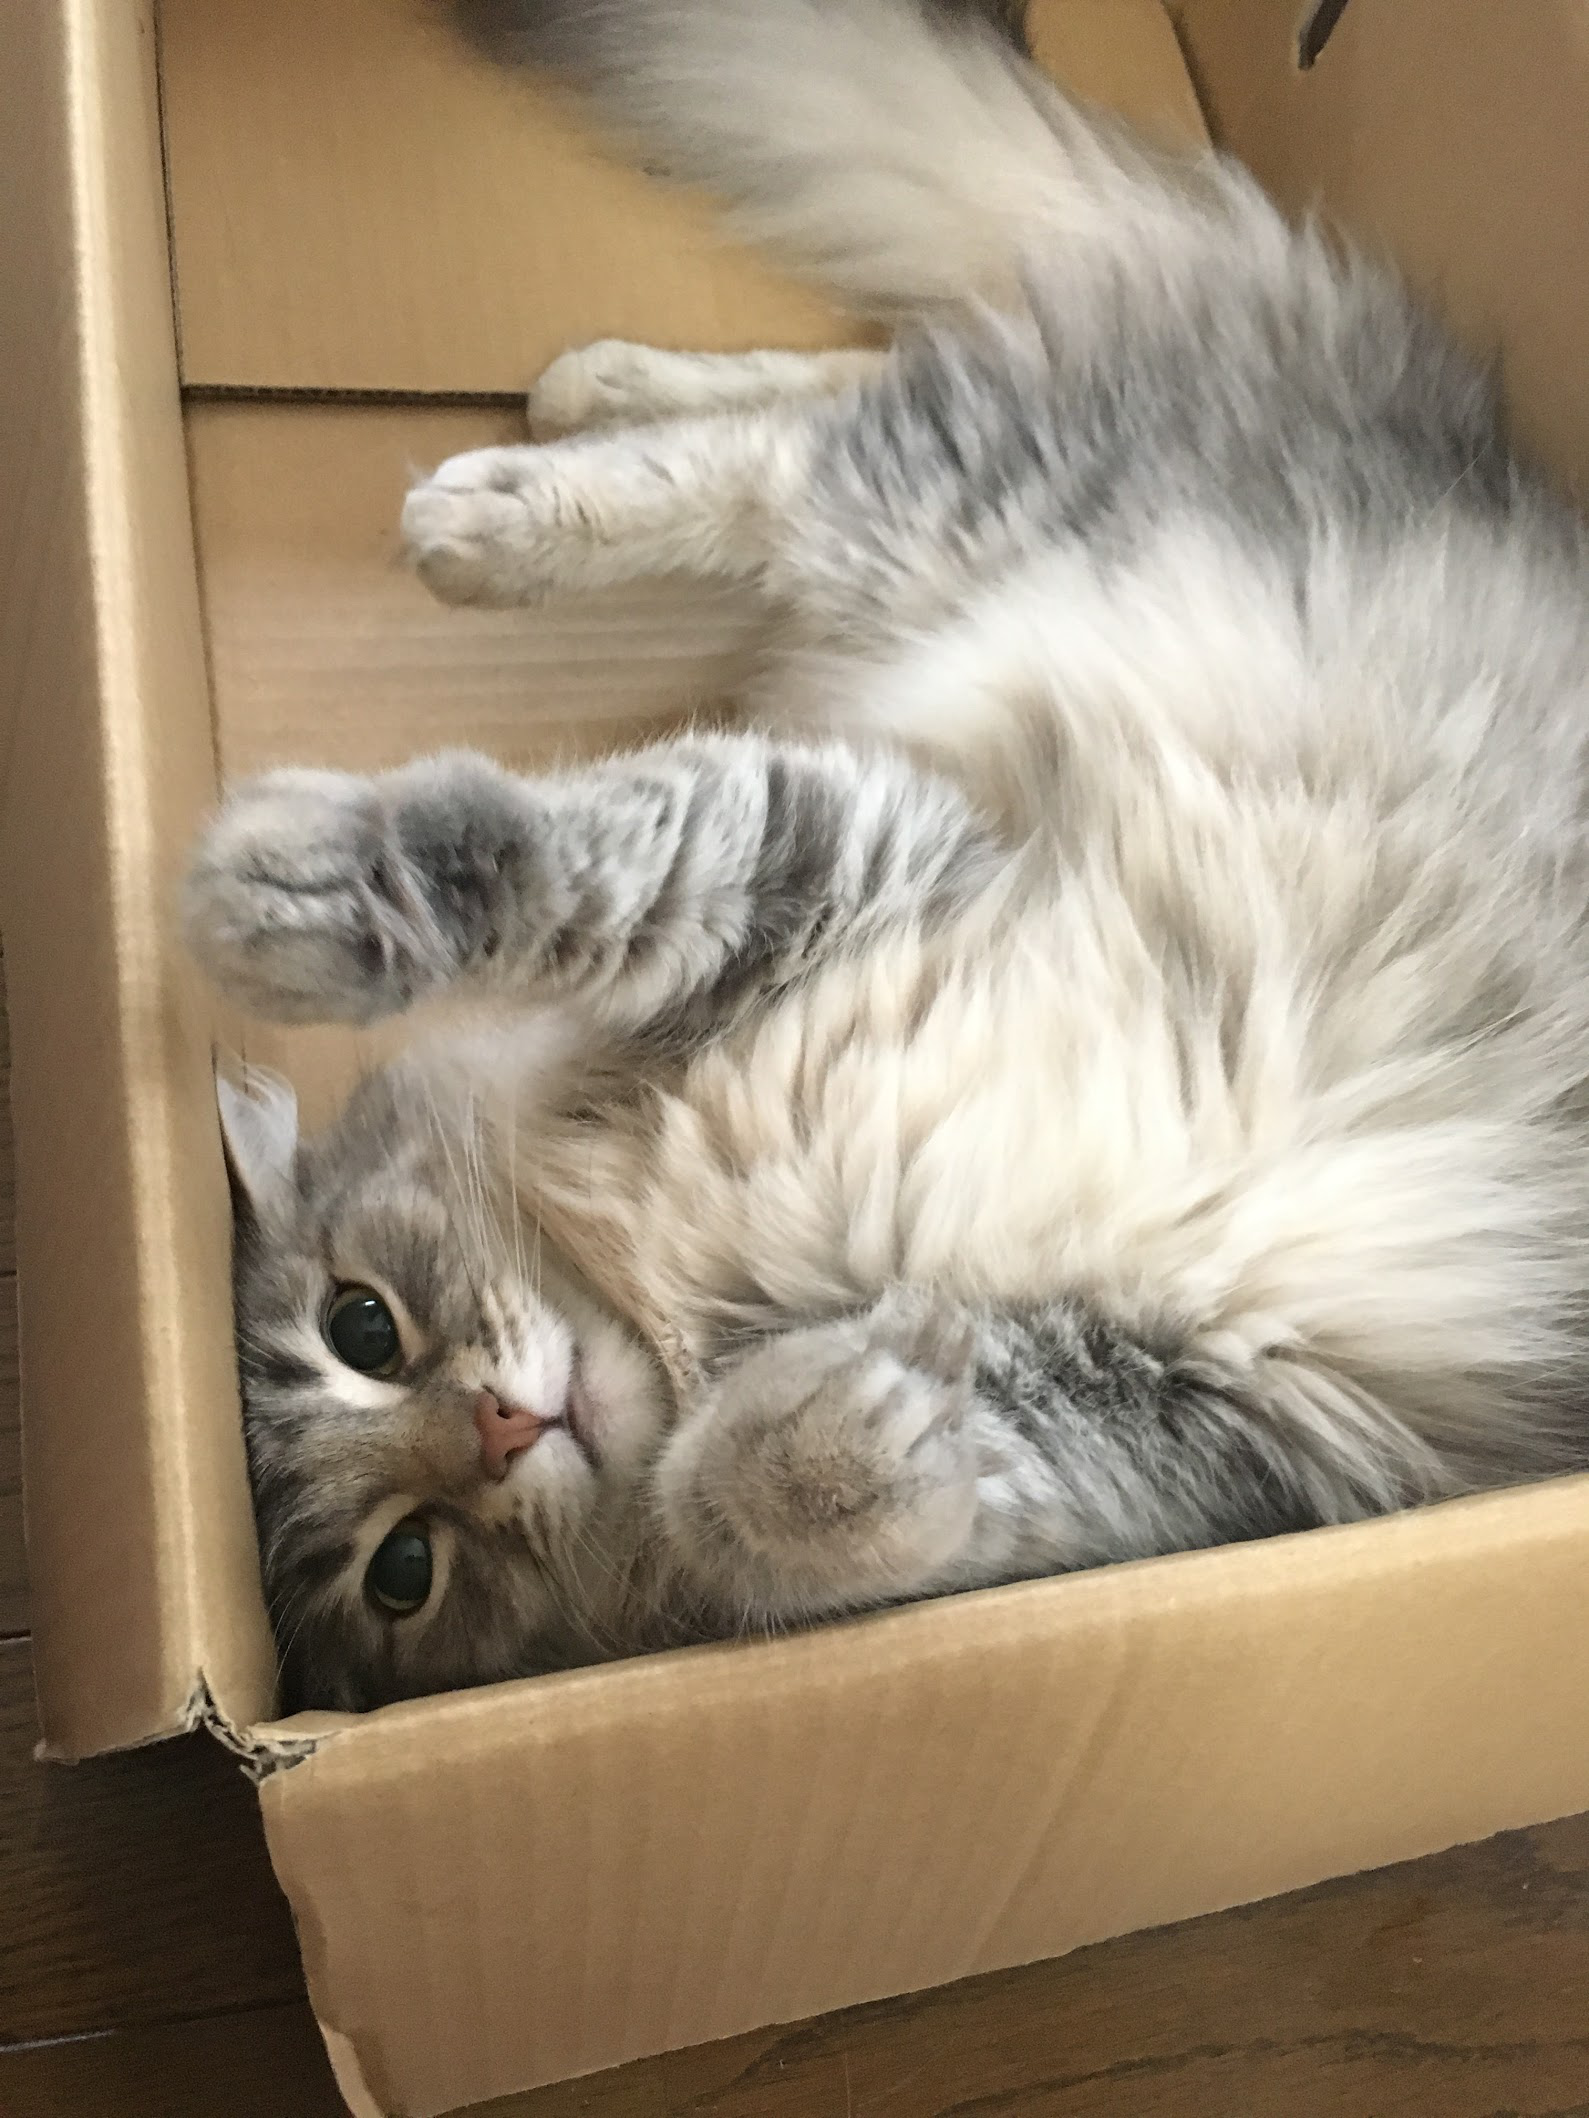

In [9]:
import turicreate as tc

# 学習させる画像を読み込む
content = tc.load_images("drive/colab/StyleTransfer/content/")
style = tc.load_images("drive/colab/StyleTransfer/style/")

# content['image'][12].show() # .show()はなぜか動かない、_to_pil_image()を使うと画像が表示される
content['image'][12]._to_pil_image()



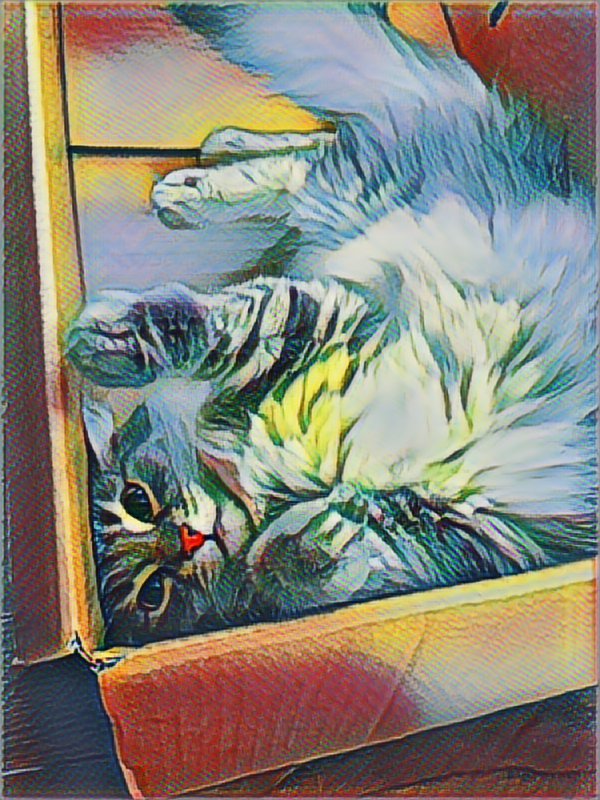

In [11]:
# model = tc.style_transfer.create(style, content, max_iterations=1)
model = tc.load_model('drive/colab/StyleTransfer/style.model/') # 事前に学習させたモデルを読み込む
model.stylize(content['image'][12], style=3)._to_pil_image()


In [25]:
from google.colab import files
model.export_coreml('MyStyle.mlmodel')
files.download('MyStyle.mlmodel')

/usr/local/lib/python3.6/dist-packages/coremltools/_deps/__init__.py:118: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  % (tensorflow.__version__, TF_MAX_VERSION))
